<a href="https://colab.research.google.com/github/elixirutkarsh/CNN_Image_classification/blob/main/CNN_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 11s 0us/step


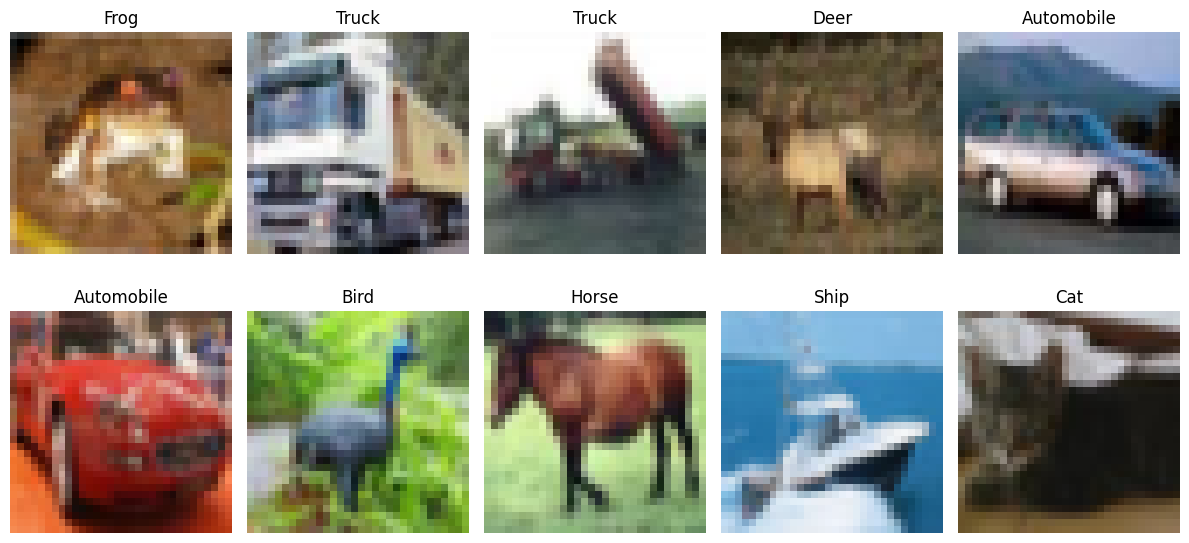

Epoch 1/10
782/782 [==============================] - 86s 108ms/step - loss: 1.6390 - accuracy: 0.3982 - val_loss: 1.2768 - val_accuracy: 0.5365
Epoch 2/10
782/782 [==============================] - 82s 105ms/step - loss: 1.2779 - accuracy: 0.5423 - val_loss: 1.1044 - val_accuracy: 0.6142
Epoch 3/10
782/782 [==============================] - 83s 106ms/step - loss: 1.1240 - accuracy: 0.6082 - val_loss: 1.0472 - val_accuracy: 0.6295
Epoch 4/10
782/782 [==============================] - 84s 108ms/step - loss: 1.0249 - accuracy: 0.6422 - val_loss: 0.9124 - val_accuracy: 0.6744
Epoch 5/10
782/782 [==============================] - 82s 104ms/step - loss: 0.9368 - accuracy: 0.6756 - val_loss: 0.8804 - val_accuracy: 0.6931
Epoch 6/10
782/782 [==============================] - 84s 107ms/step - loss: 0.8693 - accuracy: 0.6980 - val_loss: 0.8457 - val_accuracy: 0.7006
Epoch 7/10
782/782 [==============================] - 83s 106ms/step - loss: 0.8193 - accuracy: 0.7138 - val_loss: 0.8194 - val_ac

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Class labels
class_labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Plot some example images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(class_labels[np.argmax(y_train[i])])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# Generate predictions on test images
num_test_images = 10
test_images = x_test[:num_test_images]
predictions = model.predict(test_images)

# Print the predicted class labels and probabilities
for i in range(num_test_images):
    predicted_class = class_labels[np.argmax(predictions[i])]
    confidence = np.max(predictions[i]) * 100
    print(f"Image {i+1}: Predicted class '{predicted_class}' with confidence {confidence:.2f}%")
